In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/laskar ai/capstone/Ibu Hamil KEK'

all_data = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        try:
            df = pd.read_excel(file_path, header=3)
            df['source_file'] = file_name
            all_data.append(df)
        except Exception as e:
            print(f"Gagal membaca {file_name}: {e}")

combined_df = pd.concat(all_data, ignore_index=True)

In [ ]:
combined_df.to_csv("data_combined.csv", index=False)

In [ ]:
combined_df.head()

,Nama Ibu,Nik Ibu,Alamat Tempat Tinggal (Kelurahan/ Desa),Umur Ibu (tahun),Jenis Asuransi,HPHT,HPL,TB (cm),IMT Sebelum Hamil,gpa,...,KF2,KF3,KF4,KF Lengkap,KBPP Tanggal dan Metode,Komplikasi Masa Nifas,Tatalaksana PNC,Rujuk Ibu Nifas,Keterangan,source_file
0,Devi Anggriani,3215155608900003,DUREN / Perum Taman Sakinah,34.0,BPJS,2023-11-28,2024-09-04,158.0,Normal,3 2 0,...,Tidak,Tidak,Tidak,Tidak,Implant,NaN,NaN,NaN,NaN,Klari.xlsx
1,WINDA WIHAYATI,3215284908070002,MULYASEJATI / DSN. LIOSARI,17.0,NaN,2023-12-05,2024-09-12,150.0,Normal,1 0 0,...,Tidak,Tidak,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,Klari.xlsx
2,MAMAH,3215045909950002,MULYASARI / DSN. KAUM,28.0,NaN,2023-12-08,2024-09-15,155.0,Normal,2 1 0,...,Tidak,Tidak,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,Klari.xlsx
3,santi mulyani,3215056505080007,CIBALONGSARI / dusun krajan,16.0,BPJS,2023-12-01,2024-09-08,150.0,Kurus,2 0 1,...,Tidak,Tidak,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,Klari.xlsx
4,windi sri rahayu,3215054412890006,BELENDUNG / dsn sembang,29.0,Tidak Mempunyai Asuransi,2024-02-19,2024-11-26,155.0,Obesitas,2 1 0,...,Tidak,Tidak,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,Klari.xlsx


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Data columns (total 71 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Nama Ibu                                 12402 non-null  object 
 1   Nik Ibu                                  12402 non-null  object 
 2   Alamat Tempat Tinggal (Kelurahan/ Desa)  12402 non-null  object 
 3   Umur Ibu (tahun)                         12389 non-null  float64
 4   Jenis Asuransi                           5777 non-null   object 
 5   HPHT                                     12301 non-null  object 
 6   HPL                                      12402 non-null  object 
 7   TB (cm)                                  11574 non-null  float64
 8   IMT Sebelum Hamil                        11612 non-null  object 
 9   gpa                                      12402 non-null  object 
 10  Jarak Hamil                              4122 

In [ ]:
missing_counts = combined_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

print(missing_counts)

Des                                   12402
Tatalaksana PNC                       12402
Keterangan                            12402
Komplikasi Persalinan                 12393
Komplikasi Masa Nifas                 12393
TBC                                   12349
Rujuk Ibu Nifas                       12310
Faskes Rujukan                        12215
KBPP Tanggal dan Metode               12213
Komplikasi                            12085
Lain Lain                             11920
Okt                                   11613
Sep                                   11556
Agu                                   11530
Nov                                   11481
Jul                                   11356
GDS                                   11284
S                                     10809
Hepatitis B                           10809
Apr                                   10427
Mei                                   10375
Jun                                   10185
Feb                             

In [ ]:
combined_df.duplicated().sum()

np.int64(68)

In [ ]:
numerical_cols = combined_df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = combined_df.select_dtypes(include=['object', 'category']).columns.tolist()

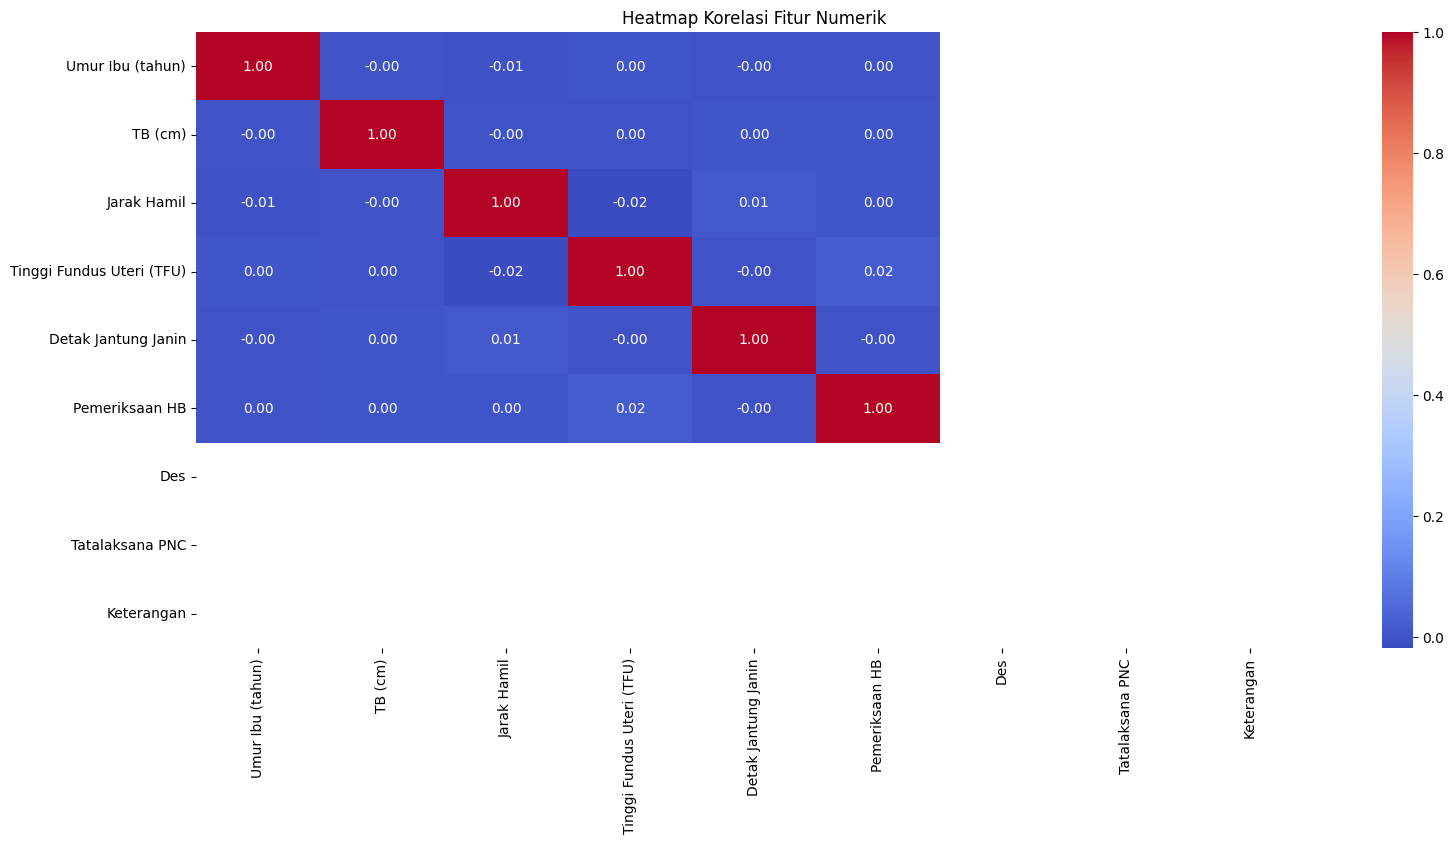

In [ ]:
# Heatmap Korelasi Numerik
if numerical_cols:
    plt.figure(figsize=(18, 8))
    corr = combined_df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Heatmap Korelasi Fitur Numerik")
    plt.show()
else:
    print("Tidak ada kolom numerik.")

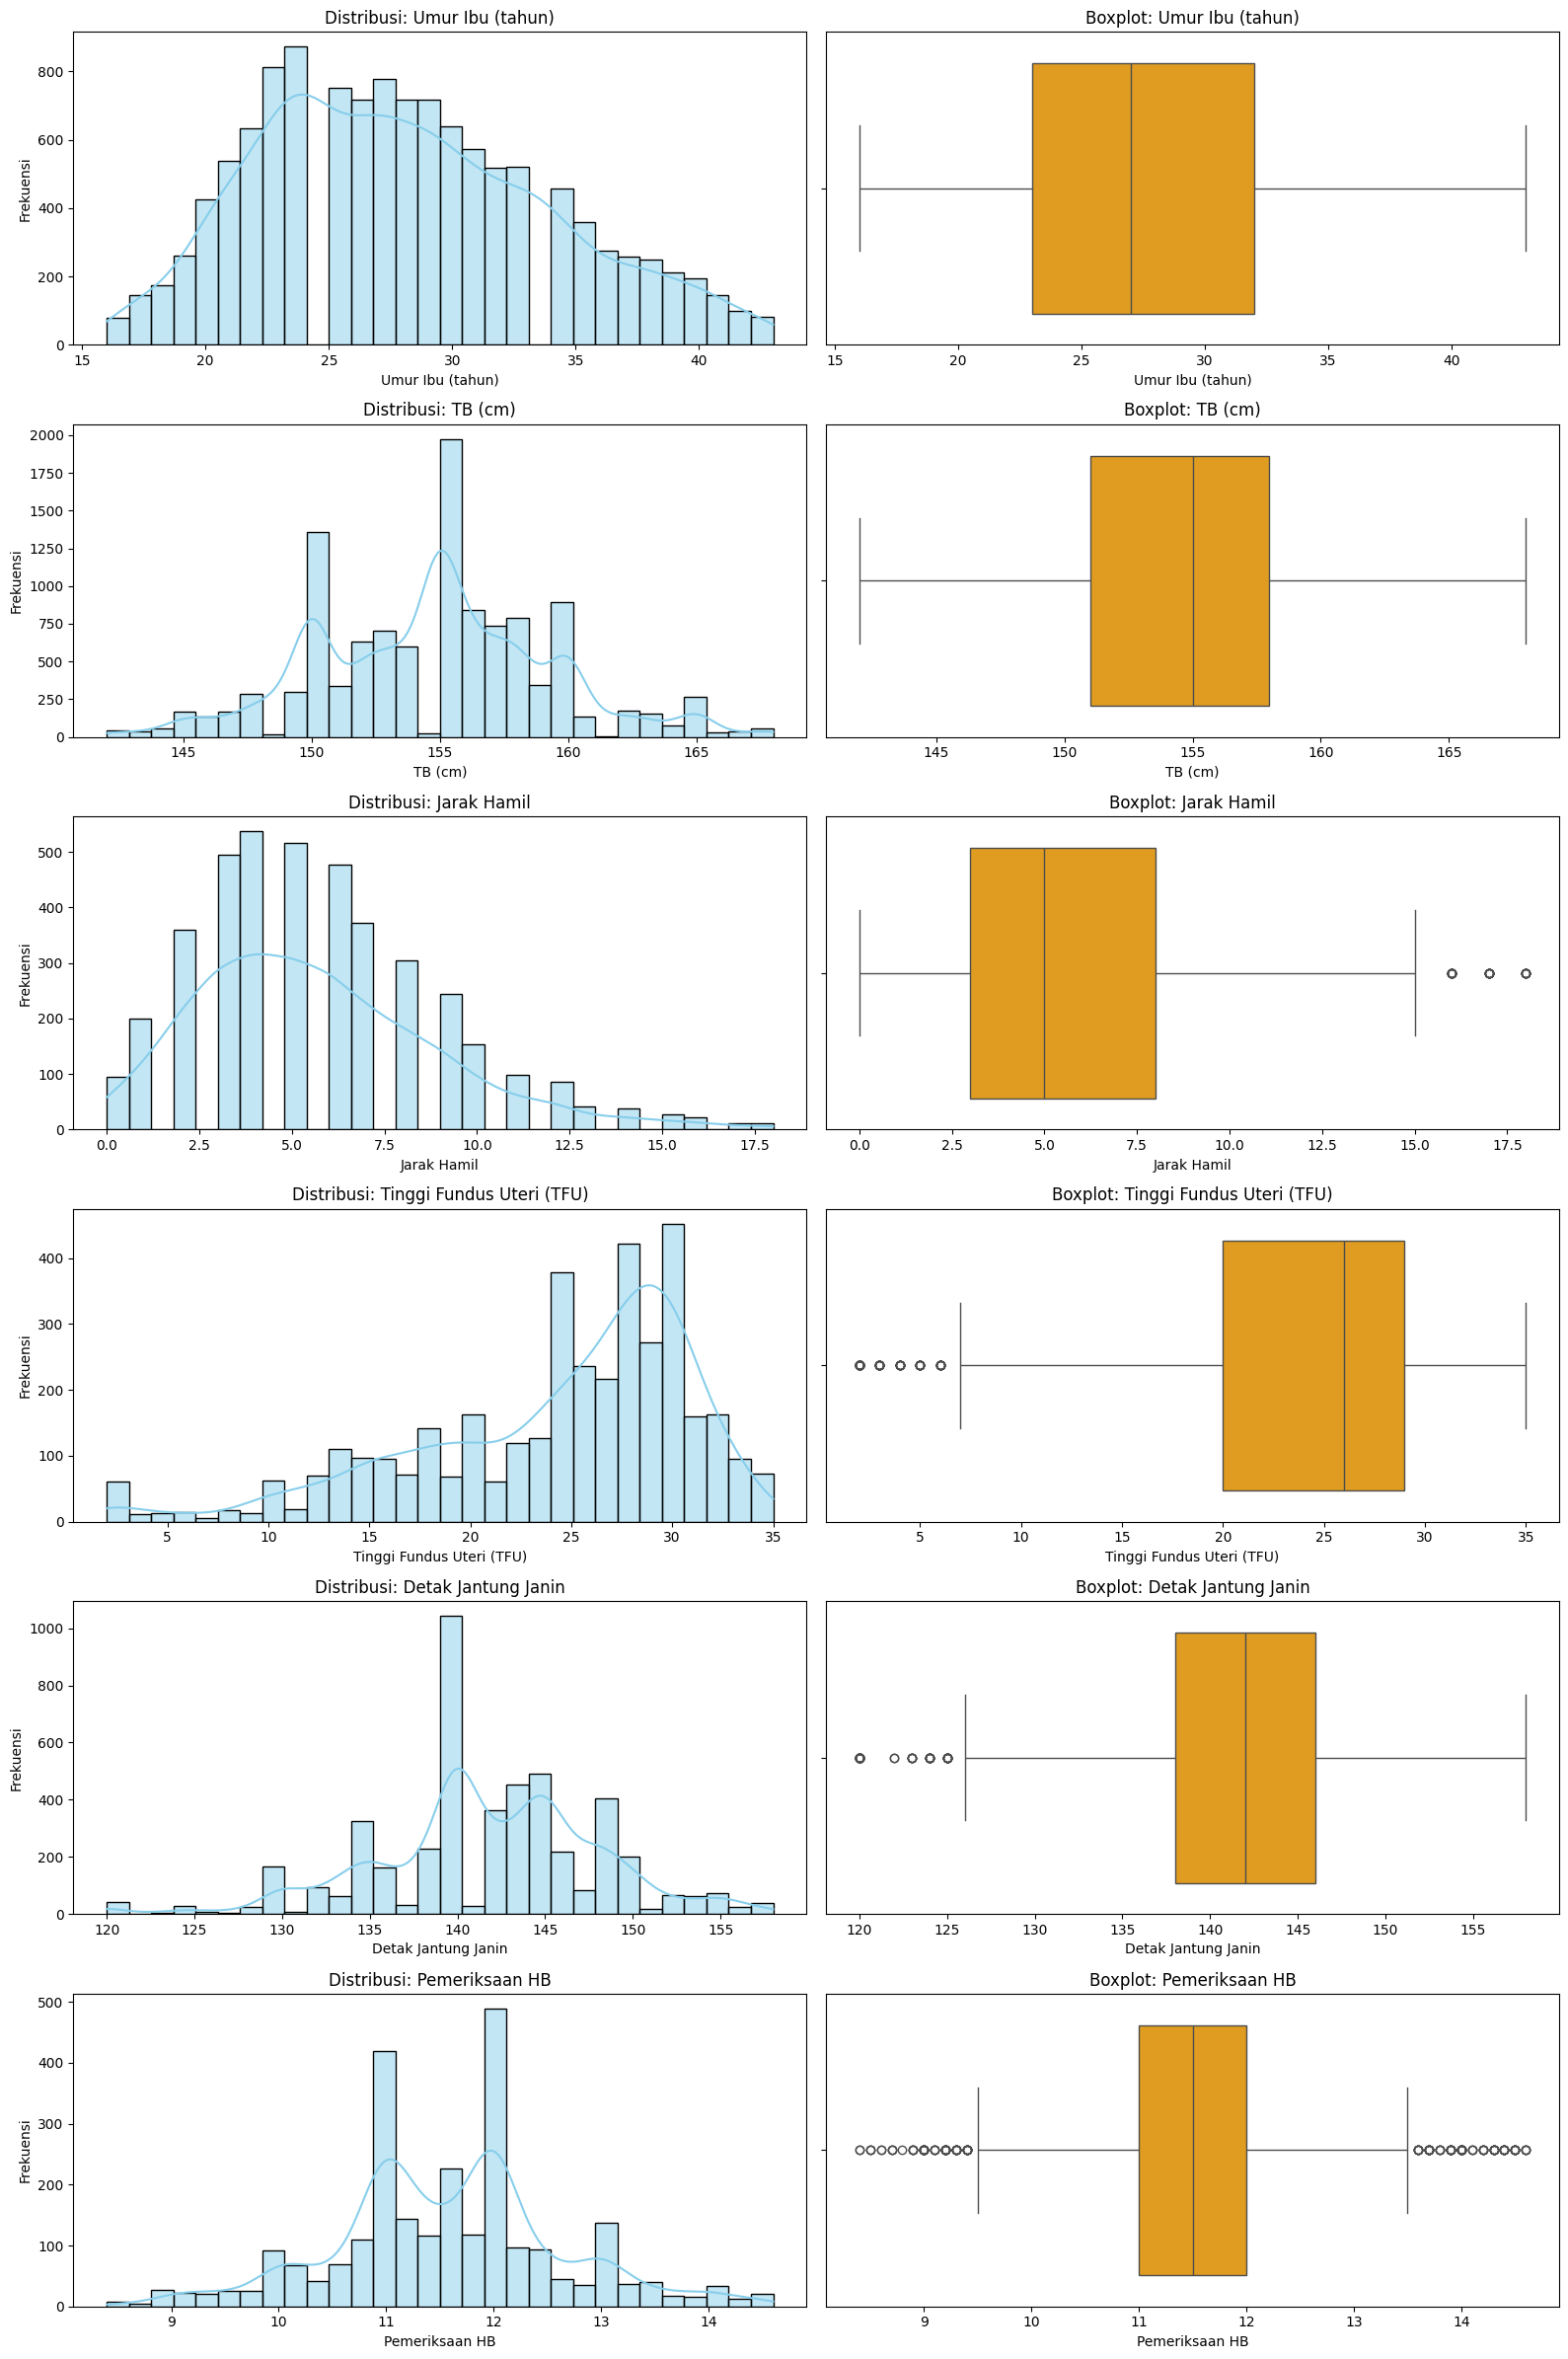

In [ ]:
numerical_cols = ['Umur Ibu (tahun)', 'TB (cm)', 'Jarak Hamil',
                  'Tinggi Fundus Uteri (TFU)', 'Detak Jantung Janin', 'Pemeriksaan HB']

n_rows = len(numerical_cols)
plt.figure(figsize=(16, 4 * n_rows))  # Lebar cukup untuk 2 plot (hist + box)

for i, col in enumerate(numerical_cols):
    data = combined_df[col].dropna()

    # Hitung quantile untuk hilangkan outlier ekstrem
    q1, q99 = data.quantile([0.01, 0.99])
    trimmed_data = data[(data >= q1) & (data <= q99)]

    # Histogram + KDE
    plt.subplot(n_rows, 2, 2 * i + 1)
    sns.histplot(trimmed_data, kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # Boxplot
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.boxplot(x=trimmed_data, color="orange")
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Deteksi outlier dengan IQR
for col in numerical_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = combined_df[(combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outlier dari total {len(combined_df)} baris")

Umur Ibu (tahun): 64 outlier dari total 12402 baris
TB (cm): 163 outlier dari total 12402 baris
Jarak Hamil: 78 outlier dari total 12402 baris
Tinggi Fundus Uteri (TFU): 108 outlier dari total 12402 baris
Detak Jantung Janin: 128 outlier dari total 12402 baris
Pemeriksaan HB: 234 outlier dari total 12402 baris


In [ ]:
for col in categorical_cols:
    uniques = combined_df[col].dropna().unique()
    sample_vals = ', '.join(map(str, uniques[:5]))  # ambil 5 contoh unik
    print(f"\n===== {col} =====")
    print(f"Jumlah Nilai Unik: {len(uniques)}")
    print(f"Contoh Nilai: {sample_vals + ('...' if len(uniques) > 5 else '')}")


===== Nama Ibu =====
Jumlah Nilai Unik: 9433
Contoh Nilai: Devi Anggriani, WINDA WIHAYATI, MAMAH, santi mulyani, windi sri rahayu...

===== Nik Ibu =====
Jumlah Nilai Unik: 11989
Contoh Nilai:  3215155608900003 ,  3215284908070002 ,  3215045909950002 ,  3215056505080007 ,  3215054412890006 ...

===== Alamat Tempat Tinggal (Kelurahan/ Desa) =====
Jumlah Nilai Unik: 5167
Contoh Nilai: DUREN / Perum Taman Sakinah, MULYASEJATI / DSN. LIOSARI, MULYASARI / DSN. KAUM, CIBALONGSARI / dusun krajan, BELENDUNG / dsn sembang...

===== Jenis Asuransi =====
Jumlah Nilai Unik: 3
Contoh Nilai: BPJS, Tidak Mempunyai Asuransi, Lainnya

===== HPHT =====
Jumlah Nilai Unik: 373
Contoh Nilai: 2023-11-28, 2023-12-05, 2023-12-08, 2023-12-01, 2024-02-19...

===== HPL =====
Jumlah Nilai Unik: 334
Contoh Nilai: 2024-09-04, 2024-09-12, 2024-09-15, 2024-09-08, 2024-11-26...

===== IMT Sebelum Hamil =====
Jumlah Nilai Unik: 4
Contoh Nilai: Normal, Kurus, Obesitas, Gemuk

===== gpa =====
Jumlah Nilai Unik: 125
Cont

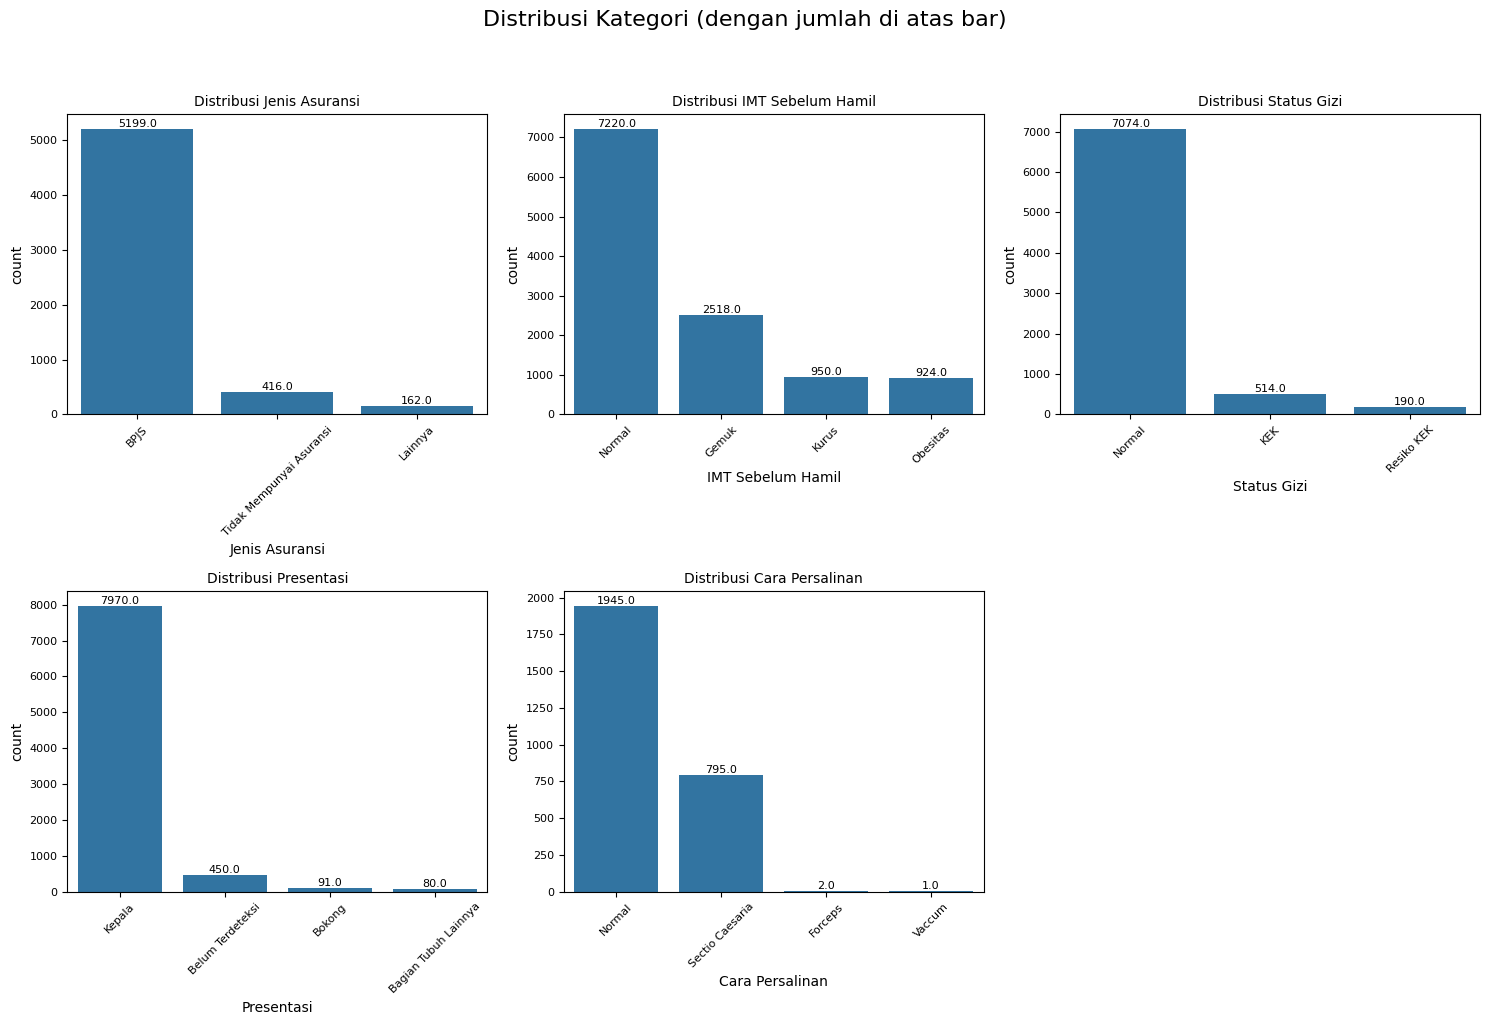

In [ ]:
categorical_columns = ['Jenis Asuransi', 'IMT Sebelum Hamil', 'Status Gizi', 'Presentasi', 'Cara Persalinan']

n_rows = 2
n_cols = math.ceil(len(categorical_columns) / n_rows)
plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for idx, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, idx + 1)

    order = combined_df[col].value_counts().index
    ax = sns.countplot(data=combined_df, x=col, order=order)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)  # font size lebih kecil agar muat

    plt.title(f'Distribusi {col}', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)  # rotasi lebih besar dan font lebih kecil
    plt.yticks(fontsize=8)

# Panggil tight_layout sekali saja di luar loop
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.suptitle("Distribusi Kategori (dengan jumlah di atas bar)", fontsize=16, y=1.02)
plt.show()

- hapus 'Nama Ibu', 'Nik Ibu', 'Alamat Tempat Tinggal (Kelurahan/ Desa)', 'Tatalaksana ANC',  'Tm 1 Dokter', 'Tm 1 USG', K4, 'Tm 3 USG', 'K6',  KF1,	KF2,	KF3,	KF4,	KF Lengkap, tatalaksana pnc, lain lain, Jan, Feb, Mar, Apr, Mei, Jun, Jul, Agu, Sep, Okt, Nov, Des

- umur ibu rentan dari 0 - 2023

- hpht format gk beraturan ada yg tahun aja, ada format penulisan 0024-02-12, 242023-12-26, 72023-02-07

- hpl ada format 2024-01-0d

- tb juga ada outlier seperti -1168, -145, -1, ....., 14, 15, ...., 83, ......., 15668

- jarak hamil ada 0 - 2020

- tekanan sistol diastol formatnya
100/
170/120
Oct-70
11070/
110/
141/103
142/107


- tinggi fundus uteri (TFU) nilainya 0 - 2635

- detak jantung janin nilainya -7, 0, 1, ....., 13080

- presentasi nilainya Kepala, Belum Terdeteksi, Bokong, Bagian Tubuh Lainnya

- golongan darah banyak angka angka, 'Tidak Diketahui',  'Tidak Diketahui-', 'Tidak Diketahui+', +, -, x

- pemeriksaan hb nilainya dari -10 sampai 1208 lalu ada angka desimalnya jg sih

- pemeriksaan protein urine isinya 90, -, +, o

- GDS isinya 0 - 374, ada angka desimal, lalu ada simbol x dan -

- H isinya 90, -, +, o

- S dan hepatitis b isinya -, +, o, x

- TBC isinya -, +, x

- malaria isinya +, no, yes

- konseling isinya yes, no, konseling, lablainnya

- faktor resiko isinya gk jelas

- komplikasi ada yang isinya begini
HDK,Pre Eklampsia
Lain lain,Obesitas
Pre Eklampsia,KEK
Lain lain,KEK
Pendarahan,Abortus
Infeksi,KPD,Pre Eklampsia

- tempat bersalin ada banyak berisi angka

- penolong persalinan banyak yg angka jg, trs ada lainnya, keluarga, dukun, dokter umum, bidan, dokter spesialis obgyn, spesialis

- kondisi ibu isinya -, meninggal, hidup

- tgl bayi lahir formatnya gk konsisten ada yg tahun-bulan-tanggal/jam-h ada yg /jam-h atau /-h trs ada jg tahun-bulan-tanggal/-h

- kondisi bayi isinya -, meninggal, hidup

- panjang bbl (cm) isinya dari 34-59 trs ada format aneh contoh
49CM
48s
1.39 cm, 2,35 cm
51 cm
49cm

- berat bayi ada format ratusan sampe ribuan trs ada yang dikasi satuan gram dengan macam macam penulisan

- komplikasi persalinan ada yg nulis lainnya sama ada yang nulis Lainnya,GEMELI

- komplikasi masa nifas ada lainnya lalu ada yg tulisan LainnyaLainnya

- rujuk ibu nifas lebih dominan tidak

- source_file diubah isinya yang misal Klari.xlsx jadi .xlsx dihapus trs judul kolom ganti Kelurahan/Desa

- pisahin gpa

- tangani duplikat total 68, tangani missing value dan outlier jumlahnya banyak

In [ ]:
cleaned_df = combined_df.copy()

In [ ]:
drop_cols = [
    'Nama Ibu', 'Nik Ibu', 'Alamat Tempat Tinggal (Kelurahan/ Desa)', 'KBPP Tanggal dan Metode',
    'Tm 1 Dokter', 'Tm 1 USG', 'K4', 'Tm 3 USG', 'K6', 'Tm 3 Usg', 'Tm 1 Usg',
    'KF1', 'KF2', 'KF3', 'KF4', 'KF Lengkap', 'Keterangan', 'Tatalaksana ANC',
    'Tatalaksana PNC', 'lain lain', 'Faktor Resiko', 'Lain Lain', 'Tgl Bayi Lahir',
    'H', 'S', 'TBC', 'Malaria', 'Pemeriksaan Protein Urine',
    'Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Tgl Bayi Lahir', 'GDS',
    'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des', 'Hepatitis B'
]
cleaned_df.drop(columns=[col for col in drop_cols if col in cleaned_df.columns], inplace=True)

In [ ]:
cleaned_df = cleaned_df.drop_duplicates()
print(f"Setelah drop duplicates: {len(cleaned_df)} baris")

Setelah drop duplicates: 12330 baris


In [ ]:
# Umur Ibu (tahun)
cleaned_df['Umur Ibu (tahun)'] = pd.to_numeric(cleaned_df['Umur Ibu (tahun)'], errors='coerce')
cleaned_df.loc[(cleaned_df['Umur Ibu (tahun)'] < 18) | (cleaned_df['Umur Ibu (tahun)'] > 100), 'Umur Ibu (tahun)'] = np.nan

In [ ]:
# IMT
cleaned_df['IMT Sebelum Hamil'] = cleaned_df['IMT Sebelum Hamil'].replace({
    'Gemuk': 'Gemuk/Obesitas',
    'Obesitas': 'Gemuk/Obesitas'
})

In [ ]:
# HPHT & HPL
def parse_date(val):
    try:
        return pd.to_datetime(val, errors='coerce', dayfirst=True)
    except:
        return np.nan

for col in ['HPHT', 'HPL']:
    cleaned_df[col] = cleaned_df[col].astype(str).str.replace(r'[^\d\-]', '', regex=True)
    cleaned_df[col] = cleaned_df[col].apply(parse_date)

<ipython-input-20-2af93d66b9c5>:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(val, errors='coerce', dayfirst=True)
<ipython-input-20-2af93d66b9c5>:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(val, errors='coerce', dayfirst=True)


In [ ]:
# TB (cm)
cleaned_df['TB (cm)'] = pd.to_numeric(cleaned_df['TB (cm)'], errors='coerce')
cleaned_df.loc[(cleaned_df['TB (cm)'] < 140) | (cleaned_df['TB (cm)'] > 190), 'TB (cm)'] = np.nan

In [ ]:
# Jarak Hamil
cleaned_df['Jarak Hamil'] = pd.to_numeric(cleaned_df['Jarak Hamil'], errors='coerce')
cleaned_df.loc[(cleaned_df['Jarak Hamil'] < 0) | (cleaned_df['Jarak Hamil'] > 100), 'Jarak Hamil'] = np.nan

In [ ]:
# Tekanan Darah (Sistole / Diastole)
def extract_bp(val):
    val = str(val)
    match = re.findall(r'(\d{2,3})[^\d]*(\d{2,3})?', val)
    if match:
        return pd.Series([int(match[0][0]), int(match[0][1]) if match[0][1] else np.nan])
    return pd.Series([np.nan, np.nan])

cleaned_df[['Sistol', 'Diastol']] = cleaned_df['Tekanan Darah (Sistole / Diastole)'].apply(extract_bp)
cleaned_df.drop(columns=['Tekanan Darah (Sistole / Diastole)'], inplace=True)

In [ ]:
# Tinggi Fundus Uteri (TFU)
cleaned_df['Tinggi Fundus Uteri (TFU)'] = pd.to_numeric(cleaned_df['Tinggi Fundus Uteri (TFU)'], errors='coerce')
cleaned_df.loc[(cleaned_df['Tinggi Fundus Uteri (TFU)'] < 10) | (cleaned_df['Tinggi Fundus Uteri (TFU)'] > 60), 'Tinggi Fundus Uteri (TFU)'] = np.nan

In [ ]:
# Detak Jantung Janin
cleaned_df['Detak Jantung Janin'] = pd.to_numeric(cleaned_df['Detak Jantung Janin'], errors='coerce')
cleaned_df.loc[(cleaned_df['Detak Jantung Janin'] < 60) | (cleaned_df['Detak Jantung Janin'] > 200), 'Detak Jantung Janin'] = np.nan

In [ ]:
# Golongan Darah
def standardize_blood(val):
    val = str(val).strip().upper().replace(' ', '')
    match = re.match(r'^(A|B|AB|O)[+-]?$', val)
    if match:
        if '+' in val or '-' in val:
            return match.group(0)
        else:
            return np.nan
    return np.nan

cleaned_df['Gol Darah dan Rhesus'] = cleaned_df['Gol Darah dan Rhesus'].apply(standardize_blood)

In [ ]:
# Pemeriksaan HB
def extract_hb(val):
    try:
        num = re.findall(r'\d+\.?\d*', str(val).replace(',', '.'))
        if num:
            val = float(num[0])
            return val if 3 <= val <= 20 else np.nan
    except:
        pass
    return np.nan

cleaned_df['Pemeriksaan HB'] = cleaned_df['Pemeriksaan HB'].apply(extract_hb)

In [ ]:
# GPA
if 'gpa' in cleaned_df.columns:
    gpa_split = cleaned_df['gpa'].astype(str).str.extract(r'(?P<Gravida>\d*)[-/ ]*(?P<Para>\d*)[-/ ]*(?P<Abortus>\d*)')
    for col in ['Gravida', 'Para', 'Abortus']:
        gpa_split[col] = pd.to_numeric(gpa_split[col], errors='coerce')
    cleaned_df = cleaned_df.drop(columns='gpa').join(gpa_split)

for col in ['Gravida', 'Para', 'Abortus']:
    if col in cleaned_df.columns:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

In [ ]:
# Panjang dan Berat BBL
def clean_panjang(val):
    try:
        val = str(val).replace(',', '.')
        val = float(re.findall(r'\d+\.?\d*', val)[0])
        return val if 40 <= val <= 60 else np.nan
    except:
        return np.nan

def clean_berat(val):
    try:
        val = str(val).replace(',', '.')
        val = float(re.findall(r'\d+\.?\d*', val)[0])
        return val if 500 <= val <= 5000 else np.nan
    except:
        return np.nan

cleaned_df['Panjang BBL (cm)'] = cleaned_df['Panjang BBL (cm)'].apply(clean_panjang)
cleaned_df['Berat BBL (gr)'] = cleaned_df['Berat BBL (gr)'].apply(clean_berat)

In [ ]:
# Kelurahan/Desa
if 'source_file' in cleaned_df.columns:
    cleaned_df['Kelurahan/Desa'] = cleaned_df['source_file'].str.replace('.xlsx', '', regex=False)
    cleaned_df.drop(columns=['source_file'], inplace=True)

In [ ]:
# Konseling
cleaned_df['Konseling'] = cleaned_df['Konseling'].astype(str).str.strip().str.lower().replace({
    'yes': 'Ya', 'no': 'Tidak', 'konseling': 'Ya', 'lablainnya': 'Tidak Diketahui'
})

In [ ]:
# Tempat Bersalin & Penolong Persalinan
for col in ['Tempat Bersalin', 'Penolong Persalinan']:
    cleaned_df[col] = cleaned_df[col].astype(str).apply(lambda x: x if not x.isdigit() else 'Tidak Diketahui')

In [ ]:
# Kondisi Ibu & Bayi
for col in ['Kondisi Ibu', 'Kondisi Bayi']:
    cleaned_df[col] = cleaned_df[col].astype(str).replace({'-': 'Tidak Diketahui'}).str.capitalize()

In [ ]:
# Rujukan
cleaned_df['Rujuk Ibu Hamil'] = cleaned_df['Rujuk Ibu Hamil'].replace({
    'yes': 'Ya', 'no': 'Tidak', 'nan': np.nan
})
cleaned_df['Rujuk Ibu Nifas'] = cleaned_df['Rujuk Ibu Nifas'].astype(str).str.lower().replace({
    'tidak': 'Tidak', 'ya': 'Ya', '1': 'Ya', '0': 'Tidak', 'no': 'Tidak', 'yes': 'Ya'
})
cleaned_df['Faskes Rujukan'] = cleaned_df.apply(
    lambda row: 'Tidak Dirujuk' if pd.isna(row['Faskes Rujukan']) and row['Rujuk Ibu Hamil'] == 'Tidak' else row['Faskes Rujukan'],
    axis=1
)

In [ ]:
# Komplikasi, Komplikasi Persalinan & Masa Nifas
def normalize_komplikasi(val):
    if pd.isna(val) or val in ['', 'nan', 'None']:
        return 'Tidak Ada'
    if isinstance(val, str):
        val = [v.strip() for v in val.split(',')]
    elif not isinstance(val, (list, tuple)):
        val = [str(val).strip()]
    parts = [re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', v).replace('_', ' ').capitalize() for v in val if v]
    unique_sorted = sorted(set(parts))
    return ', '.join(unique_sorted) if unique_sorted else 'Tidak Ada'

for col in ['Komplikasi', 'Komplikasi Persalinan', 'Komplikasi Masa Nifas']:
    if col in cleaned_df.columns:
        cleaned_df[col] = cleaned_df[col].astype(str).apply(normalize_komplikasi)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12401
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Umur Ibu (tahun)                 12000 non-null  float64       
 1   Jenis Asuransi                   5763 non-null   object        
 2   HPHT                             12211 non-null  datetime64[ns]
 3   HPL                              12328 non-null  datetime64[ns]
 4   TB (cm)                          11459 non-null  float64       
 5   IMT Sebelum Hamil                11550 non-null  object        
 6   Jarak Hamil                      4091 non-null   float64       
 7   Status Td                        7182 non-null   object        
 8   Status Gizi                      7777 non-null   object        
 9   Tinggi Fundus Uteri (TFU)        3701 non-null   float64       
 10  Detak Jantung Janin              4806 non-null   float64       

| **Nama Kolom**                  | **Keterangan yang Disesuaikan**                                                                   |
| ------------------------------- | ------------------------------------------------------------------------------------------------- |
| Umur Ibu (tahun)                | Usia ibu dalam tahun saat pemeriksaan kehamilan.                                                  |
| Jenis Asuransi                  | Jenis jaminan kesehatan ibu, seperti BPJS, tidak memiliki asuransi, atau lainnya.                 |
| HPHT                            | Hari Pertama Haid Terakhir, digunakan untuk menghitung usia kehamilan.                            |
| HPL                             | Hari Perkiraan Lahir berdasarkan HPHT atau hasil pemeriksaan USG.                                 |
| TB (cm)                         | Tinggi badan ibu dalam satuan sentimeter.                                                         |
| IMT Sebelum Hamil               | Kategori Indeks Massa Tubuh ibu sebelum hamil: Kurus, Normal, atau Gemuk/Obesitas.                |
| Jarak Hamil                     | Jarak waktu antara kehamilan sekarang dengan kehamilan sebelumnya (dalam bulan).                  |
| Status Td                       | Status imunisasi TT (Tetanus Toksoid) ibu, seperti T0 hingga TT5.                                 |
| Status Gizi                     | Status gizi ibu berdasarkan pemeriksaan: Normal, KEK (Kekurangan Energi Kronik), atau Risiko KEK. |
| Tinggi Fundus Uteri (TFU)       | Ukuran tinggi puncak rahim ibu hamil, untuk memantau pertumbuhan janin.                           |
| Detak Jantung Janin             | Denyut jantung janin per menit saat pemeriksaan kehamilan.                                        |
| Presentasi                      | Posisi janin dalam kandungan, seperti kepala, bokong, atau posisi lainnya.                        |
| Gol Darah dan Rhesus            | Golongan darah dan rhesus ibu, seperti A+, O+, B+, AB+, A−, dll.                                  |
| Pemeriksaan HB                  | Nilai hemoglobin ibu, indikator kondisi anemia.                                                   |
| Rujuk Ibu Hamil                 | Status apakah ibu dirujuk selama masa kehamilan (Ya/Tidak).                                       |
| Faskes Rujukan                  | Jenis fasilitas kesehatan tujuan rujukan, seperti RS, Puskesmas PONED, atau tidak dirujuk.        |
| Konseling                       | Status pemberian konseling kepada ibu                  |
| Komplikasi                      | Komplikasi selama kehamilan seperti HDK, KEK, dan lainnya, atau tidak ada komplikasi.             |
| Cara Persalinan                 | Metode persalinan ibu: Normal, Sectio Caesaria (SC), Vakum, atau Forceps.                         |
| Tempat Bersalin                 | Tempat persalinan                                      |
| Penolong Persalinan             | Tenaga kesehatan yang menolong persalinan       |
| Kondisi Ibu                     | Kondisi ibu setelah persalinan                           |
| Kondisi Bayi                    | Kondisi bayi saat lahir                                  |
| Panjang BBL (cm)                | Panjang bayi baru lahir dalam sentimeter.                                                         |
| Berat BBL (gr)                  | Berat badan bayi baru lahir dalam gram.                                                           |
| Komplikasi Persalinan           | Komplikasi yang terjadi saat proses persalinan: preeklamsia, eklampsia, perdarahan, dll.          |
| Rujuk Ibu Bersalin (Ya / Tidak) | Apakah ibu dirujuk saat proses persalinan.                                                        |
| Komplikasi Masa Nifas           | Komplikasi yang terjadi selama masa nifas: perdarahan, eklampsia, dll.                            |
| Rujuk Ibu Nifas                 | Status rujukan ibu selama masa nifas                                     |
| Sistol                          | Tekanan darah sistolik ibu saat diperiksa (angka atas).                                           |
| Diastol                         | Tekanan darah diastolik ibu saat diperiksa (angka bawah).                                         |
| Gravida                         | Total jumlah kehamilan yang pernah dialami ibu.                                                   |
| Para                            | Jumlah persalinan hidup yang pernah dilakukan ibu.                                                |
| Abortus                         | Jumlah kehamilan yang berakhir sebelum cukup bulan (keguguran).                                   |
| Kelurahan/Desa                  | Nama kelurahan atau desa tempat tinggal ibu, mencakup 50 wilayah berbeda.                         |


In [ ]:
cleaned_df.describe()

,Umur Ibu (tahun),HPHT,HPL,TB (cm),Jarak Hamil,Tinggi Fundus Uteri (TFU),Detak Jantung Janin,Pemeriksaan HB,Panjang BBL (cm),Berat BBL (gr),Sistol,Diastol,Gravida,Para,Abortus
count,12000.000000,12211,12328,11459.000000,4091.000000,3701.000000,4806.00000,2659.000000,2918.000000,2822.000000,8627.000000,8609.000000,11933.000000,12328.000000,12285.000000
mean,28.359750,2023-09-25 11:50:58.717549824,2024-07-06 13:48:44.853990912,154.781840,5.771694,25.031559,141.82938,11.563407,48.971042,3052.542877,111.958618,74.487397,2.112461,1.052644,0.108669
min,18.000000,2003-01-05 00:00:00,2024-01-01 00:00:00,140.000000,0.000000,10.000000,107.00000,6.800000,40.000000,1000.000000,10.000000,50.000000,0.000000,0.000000,0.000000
25%,24.000000,2023-06-20 00:00:00,2024-04-17 00:00:00,151.000000,3.000000,21.000000,139.00000,11.000000,48.000000,2800.000000,108.000000,70.000000,1.000000,0.000000,0.000000
50%,28.000000,2023-09-29 00:00:00,2024-07-19 12:00:00,155.000000,5.000000,27.000000,142.00000,11.500000,49.000000,3000.000000,110.000000,70.000000,2.000000,1.000000,0.000000
75%,32.000000,2023-12-15 00:00:00,2024-09-26 00:00:00,158.000000,8.000000,30.000000,146.00000,12.000000,50.000000,3300.000000,120.000000,80.000000,3.000000,2.000000,0.000000
max,56.000000,2024-12-02 00:00:00,2024-12-11 00:00:00,181.000000,39.000000,41.000000,182.00000,16.500000,59.000000,4500.000000,214.000000,131.000000,34.000000,44.000000,10.000000
std,5.978292,NaN,NaN,4.908875,3.584085,5.985967,6.69126,1.167337,1.645557,399.952612,11.391522,7.868760,1.188385,1.548094,0.397805


In [ ]:
# Regenerate categorical_cols after dropping columns
categorical_cols = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    uniques = cleaned_df[col].dropna().unique()
    sample_vals = ', '.join(map(str, uniques[:5]))  # ambil 5 contoh unik
    print(f"\n===== {col} =====")
    print(f"Jumlah Nilai Unik: {len(uniques)}")
    print(f"Contoh Nilai: {sample_vals + ('...' if len(uniques) > 5 else '')}")


===== Jenis Asuransi =====
Jumlah Nilai Unik: 3
Contoh Nilai: BPJS, Tidak Mempunyai Asuransi, Lainnya

===== IMT Sebelum Hamil =====
Jumlah Nilai Unik: 3
Contoh Nilai: Normal, Kurus, Gemuk/Obesitas

===== Status Td =====
Jumlah Nilai Unik: 6
Contoh Nilai: T1, T2, T0, TT5, T3...

===== Status Gizi =====
Jumlah Nilai Unik: 3
Contoh Nilai: Normal, KEK, Resiko KEK

===== Presentasi =====
Jumlah Nilai Unik: 4
Contoh Nilai: Kepala, Belum Terdeteksi, Bokong, Bagian Tubuh Lainnya

===== Gol Darah dan Rhesus =====
Jumlah Nilai Unik: 8
Contoh Nilai: B+, AB+, O+, A+, A-...

===== Rujuk Ibu Hamil =====
Jumlah Nilai Unik: 2
Contoh Nilai: Tidak, Ya

===== Faskes Rujukan =====
Jumlah Nilai Unik: 3
Contoh Nilai: Tidak Dirujuk, Puskesmas PONED, RS

===== Konseling =====
Jumlah Nilai Unik: 4
Contoh Nilai: Ya, nan, Tidak, Tidak Diketahui

===== Komplikasi =====
Jumlah Nilai Unik: 21
Contoh Nilai: Tidak Ada, Kek, Komplikasi, Hdk, Lain lain...

===== Cara Persalinan =====
Jumlah Nilai Unik: 4
Contoh Nilai

In [ ]:
cleaned_df['Umur Ibu (tahun)'] = cleaned_df['Umur Ibu (tahun)'].fillna(cleaned_df['Umur Ibu (tahun)'].median())
cleaned_df['TB (cm)'] = cleaned_df['TB (cm)'].fillna(cleaned_df['TB (cm)'].median())
cleaned_df['Sistol'] = cleaned_df['Sistol'].fillna(cleaned_df['Sistol'].median())
cleaned_df['Diastol'] = cleaned_df['Diastol'].fillna(cleaned_df['Diastol'].median())
cleaned_df['Pemeriksaan HB'] = cleaned_df['Pemeriksaan HB'].fillna(cleaned_df['Pemeriksaan HB'].median())
cleaned_df['IMT Sebelum Hamil'] = cleaned_df['IMT Sebelum Hamil'].fillna(cleaned_df['IMT Sebelum Hamil'].mode()[0])

for col in ['Gravida', 'Para', 'Abortus']:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())

In [ ]:
print("Persentase missing tiap kolom:")
print((cleaned_df.isna().mean() * 100).sort_values(ascending=False))

print("\nJumlah baris tersisa:", len(cleaned_df))

Persentase missing tiap kolom:
Cara Persalinan                    77.753447
Berat BBL (gr)                     77.112733
Panjang BBL (cm)                   76.334144
Gol Darah dan Rhesus               70.105434
Tinggi Fundus Uteri (TFU)          69.983779
Jarak Hamil                        66.820762
Detak Jantung Janin                61.021898
Jenis Asuransi                     53.260341
Status Td                          41.751825
Status Gizi                        36.926196
Presentasi                         30.332522
Faskes Rujukan                     30.194647
Rujuk Ibu Hamil                    30.040552
HPHT                                0.965126
HPL                                 0.016221
Umur Ibu (tahun)                    0.000000
Pemeriksaan HB                      0.000000
TB (cm)                             0.000000
IMT Sebelum Hamil                   0.000000
Komplikasi                          0.000000
Konseling                           0.000000
Tempat Bersalin         

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Mapping
mapping_status_td = {'T1': 1, 'T2': 2, 'T3': 3}
mapping_presentasi = {
    'Kepala': 1, 'Bokong': 2,
    'Belum Terdeteksi': 3, 'Bagian Tubuh Lainnya': 4
}

# Category Mapping
def map_categories(df):
    df = df.copy()
    df['Status Td'] = df['Status Td'].map(mapping_status_td)
    df['Presentasi'] = df['Presentasi'].map(mapping_presentasi)
    return df

def reverse_map_categories(df):
    df = df.copy()
    reverse_status_td = {v: k for k, v in mapping_status_td.items()}
    reverse_presentasi = {v: k for k, v in mapping_presentasi.items()}
    df['Status Td'] = df['Status Td'].map(reverse_status_td)
    df['Presentasi'] = df['Presentasi'].map(reverse_presentasi)
    return df

# Imputasi Status Gizi
def impute_status_gizi(df, feature_cols):
    df = df.copy()
    df_train = df[df['Status Gizi'].notna()].copy()
    df_pred = df[df['Status Gizi'].isna()].copy()

    if df_pred.empty:
        return df

    for col in feature_cols:
        df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
        df_pred[col] = pd.to_numeric(df_pred[col], errors='coerce')
        median_val = df_train[col].median()
        df_train[col] = df_train[col].fillna(median_val)
        df_pred[col] = df_pred[col].fillna(median_val)

    le = LabelEncoder()
    y_train = le.fit_transform(df_train['Status Gizi'])
    clf = RandomForestClassifier(random_state=42)
    clf.fit(df_train[feature_cols], y_train)
    y_pred = clf.predict(df_pred[feature_cols])

    df.loc[df['Status Gizi'].isna(), 'Status Gizi'] = le.inverse_transform(y_pred)
    return df

# Imputasi Kategorikal berdasarkan modus per label
def impute_categorical_mode(df, col, label_col='Status Gizi'):
    df = df.copy()
    for status in df[label_col].dropna().unique():
        mode_val = df.loc[df[label_col] == status, col].mode()
        if not mode_val.empty:
            mask = (df[col].isna()) & (df[label_col] == status)
            df.loc[mask, col] = mode_val[0]
    return df

# Imputasi Numerik KNN per label
def impute_numerical_knn_per_label(df, num_cols, label_col='Status Gizi', n_neighbors=3):
    df = df.copy()
    for label in df[label_col].dropna().unique():
        idx = df[df[label_col] == label].index
        sub_df = df.loc[idx, num_cols].apply(pd.to_numeric, errors='coerce')

        if len(sub_df) < n_neighbors:
            print(f"⚠️ Skip '{label}' (kurang dari {n_neighbors} baris)")
            continue

        filled = sub_df.fillna(sub_df.median())
        imputer = KNNImputer(n_neighbors=n_neighbors)
        imputed = imputer.fit_transform(filled)
        df.loc[idx, num_cols] = imputed
    return df

# Imputasi Status Gizi
target_cols = ['Umur Ibu (tahun)', 'TB (cm)', 'IMT Sebelum Hamil']
cleaned_df = impute_status_gizi(cleaned_df, target_cols)

# Mapping kategori ke angka
cleaned_df = map_categories(cleaned_df)

# Imputasi kategori dengan modus
cat_cols = ['Presentasi', 'Faskes Rujukan', 'Rujuk Ibu Hamil']
for col in cat_cols:
    cleaned_df = impute_categorical_mode(cleaned_df, col)

# Imputasi numerik dengan KNN per label
knn_cols = ['Sistol', 'Diastol', 'Status Td', 'Presentasi']
cleaned_df = impute_numerical_knn_per_label(cleaned_df, knn_cols)

# Reverse map ke kategori asli (jika perlu)
cleaned_df = reverse_map_categories(cleaned_df)

# Interpolasi lanjutan
interp_cols = ['Sistol', 'Diastol', 'Berat BBL (gr)', 'Panjang BBL (cm)']
for col in interp_cols:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
    cleaned_df[col] = cleaned_df[col].interpolate(method='linear', limit_direction='both')

# Imputasi fallback kategori yang masih NaN
for col in cat_cols:
    cleaned_df[col].fillna(cleaned_df[col].mode()[0], inplace=True)

print("Sisa missing:")
print(cleaned_df.isna().mean() * 100)

Sisa missing:
Umur Ibu (tahun)                    0.000000
Jenis Asuransi                     53.260341
HPHT                                0.965126
HPL                                 0.016221
TB (cm)                             0.000000
IMT Sebelum Hamil                   0.000000
Jarak Hamil                        66.820762
Status Td                           0.000000
Status Gizi                         0.000000
Tinggi Fundus Uteri (TFU)          69.983779
Detak Jantung Janin                61.021898
Presentasi                          0.000000
Gol Darah dan Rhesus               70.105434
Pemeriksaan HB                      0.000000
Rujuk Ibu Hamil                     0.000000
Faskes Rujukan                      0.000000
Konseling                           0.000000
Komplikasi                          0.000000
Cara Persalinan                    77.753447
Tempat Bersalin                     0.000000
Penolong Persalinan                 0.000000
Kondisi Ibu                         0.000

<ipython-input-41-01f21d841279>:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df[col].fillna(cleaned_df[col].mode()[0], inplace=True)


In [ ]:
# -------------------- IMPUTASI LANJUTAN --------------------

# Imputasi kategorikal global mode
def impute_global_mode(df, cols):
    df = df.copy()
    for col in cols:
        mode_val = df[col].mode()
        if not mode_val.empty:
            df[col] = df[col].fillna(mode_val[0])
    return df

# Imputasi kategori per kolom acuan (mode per desa misalnya)
def impute_categorical_per_group(df, target_col, group_col):
    df = df.copy()
    for group in df[group_col].dropna().unique():
        mode_val = df.loc[df[group_col] == group, target_col].mode()
        if not mode_val.empty:
            mask = (df[target_col].isna()) & (df[group_col] == group)
            df.loc[mask, target_col] = mode_val[0]
    return df

# Imputasi numerik median per label
def impute_numerical_median_per_label(df, target_cols, label_col):
    df = df.copy()
    for col in target_cols:
        for label in df[label_col].dropna().unique():
            median_val = df.loc[df[label_col] == label, col].median()
            print(f"Median {col} untuk label {label}: {median_val}")
            mask = (df[col].isna()) & (df[label_col] == label)
            df.loc[mask, col] = median_val
    return df

# Imputasi tanggal → ffill atau drop
def impute_dates(df, date_cols):
    df = df.copy()
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[col] = df[col].fillna(method='bfill').fillna(method='ffill')
    return df

# -------------------- EKSEKUSI --------------------

# Imputasi kategorikal per group (mode per desa)
cleaned_df = impute_categorical_per_group(cleaned_df, 'Jenis Asuransi', 'Kelurahan/Desa')

# Imputasi gol darah global mode
cleaned_df = impute_global_mode(cleaned_df, ['Gol Darah dan Rhesus', 'Cara Persalinan'])

# Imputasi numerik median per label status gizi
cleaned_df = impute_numerical_median_per_label(
    cleaned_df,
    ['Tinggi Fundus Uteri (TFU)', 'Detak Jantung Janin'],
    label_col='Status Gizi'
)

# Imputasi tanggal
cleaned_df = impute_dates(cleaned_df, ['HPHT', 'HPL'])


Median Tinggi Fundus Uteri (TFU) untuk label Normal: 27.0
Median Tinggi Fundus Uteri (TFU) untuk label KEK: 23.0
Median Tinggi Fundus Uteri (TFU) untuk label Resiko KEK: 24.0
Median Detak Jantung Janin untuk label Normal: 142.0
Median Detak Jantung Janin untuk label KEK: 142.0
Median Detak Jantung Janin untuk label Resiko KEK: 140.0


<ipython-input-42-f978b9b0ccb8>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='bfill').fillna(method='ffill')
<ipython-input-42-f978b9b0ccb8>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='bfill').fillna(method='ffill')


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

def impute_jarak_hamil(df):
    df = df.copy()

    # Cek apakah kolom 'Status Gizi' bertipe objek (kategori) sebelum encoding
    le = None
    if df['Status Gizi'].dtype == 'object':
        le = LabelEncoder()
        # Handle potential NaN values by converting to string before encoding
        df['Status Gizi_encoded'] = le.fit_transform(df['Status Gizi'].astype(str).fillna('nan'))
        status_gizi_col_name = 'Status Gizi_encoded'
    else:
        status_gizi_col_name = 'Status Gizi' # Jika sudah numerik, gunakan nama asli

    # Split antara missing dan non-missing
    df_missing = df[df['Jarak Hamil'].isna()].copy()
    df_not_missing = df[df['Jarak Hamil'].notna()].copy()

    # Fitur dan target untuk prediksi imputasi
    # Hapus 'Jumlah Anak' jika tidak ada di DataFrame
    features = ['Umur Ibu (tahun)', status_gizi_col_name]
    target = 'Jarak Hamil'

    # Pastikan kolom fitur ada sebelum digunakan
    available_features = [f for f in features if f in df_not_missing.columns]
    if not available_features:
        print("Warning: Tidak ada fitur yang relevan untuk imputasi Jarak Hamil.")
        # Kembali ke imputasi median sederhana jika tidak ada fitur
        median_jarak_hamil = df[target].median()
        df[target] = df[target].fillna(median_jarak_hamil)
        # Decode kembali jika Status Gizi diencode sementara
        if 'Status Gizi_encoded' in df.columns and le is not None:
             df['Status Gizi'] = le.inverse_transform(df['Status Gizi_encoded'].astype(int))
             df = df.drop(columns='Status Gizi_encoded')
        return df


    # Imputer untuk missing value numerik di fitur
    imputer = SimpleImputer(strategy='mean')

    # Lakukan fit_transform hanya pada kolom numerik yang tersedia
    X_train = imputer.fit_transform(df_not_missing[available_features].select_dtypes(include=np.number))
    y_train = df_not_missing[target]

    # Model untuk prediksi imputasi (misalnya Random Forest)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Prediksi nilai yang hilang
    # Lakukan transform hanya pada kolom numerik yang tersedia
    X_missing = imputer.transform(df_missing[available_features].select_dtypes(include=np.number))
    y_pred = model.predict(X_missing)

    # Mengisi nilai yang hilang
    df.loc[df['Jarak Hamil'].isna(), 'Jarak Hamil'] = y_pred

    # Decode kembali 'Status Gizi' ke kategori jika sebelumnya diencode
    if 'Status Gizi_encoded' in df.columns and le is not None:
        # Map encoded values back to original labels, including handling 'nan' category
        df['Status Gizi'] = df['Status Gizi_encoded'].map(lambda x: le.inverse_transform([x])[0] if pd.notna(x) else np.nan)
        # Replace the temporary encoded column
        df = df.drop(columns='Status Gizi_encoded')


    return df

cleaned_df = impute_jarak_hamil(cleaned_df)

In [ ]:
print("Missing value setelah imputasi lanjutan:")
print(cleaned_df.isna().mean() * 100)

Missing value setelah imputasi lanjutan:
Umur Ibu (tahun)                   0.0
Jenis Asuransi                     0.0
HPHT                               0.0
HPL                                0.0
TB (cm)                            0.0
IMT Sebelum Hamil                  0.0
Jarak Hamil                        0.0
Status Td                          0.0
Status Gizi                        0.0
Tinggi Fundus Uteri (TFU)          0.0
Detak Jantung Janin                0.0
Presentasi                         0.0
Gol Darah dan Rhesus               0.0
Pemeriksaan HB                     0.0
Rujuk Ibu Hamil                    0.0
Faskes Rujukan                     0.0
Konseling                          0.0
Komplikasi                         0.0
Cara Persalinan                    0.0
Tempat Bersalin                    0.0
Penolong Persalinan                0.0
Kondisi Ibu                        0.0
Kondisi Bayi                       0.0
Panjang BBL (cm)                   0.0
Berat BBL (gr)         

In [ ]:
def parse_date(val):
    try:
        return pd.to_datetime(val, errors='coerce', dayfirst=True)
    except:
        return pd.NaT

def normalize_multilabel(val):
    if pd.isna(val) or str(val).lower() in ['nan', 'none', 'tidak ada', '']:
        return 'Tidak Ada'
    if isinstance(val, str):
        val_list = [v.strip().lower() for v in val.split(',') if v.strip() and 'lain' not in v.lower()]
    else:
        val_list = [str(val).strip().lower()]
    parts = [v.replace('_', ' ').capitalize() for v in val_list]
    return ', '.join(sorted(set(parts))) if parts else 'Tidak Ada'

def normalize_categorical(val, na_values=['nan', 'tidak diketahui', '', 'none', '-', 'x', 'o']):
    if pd.isna(val) or str(val).strip().lower() in na_values:
        return np.nan
    val = str(val).strip().lower()
    return val.capitalize()

def estimate_hpht(row):
    hpht = row['HPHT']
    hpl = row['HPL']

    # Jika HPHT valid dan HPL valid, cek jarak
    if pd.notna(hpht) and pd.notna(hpl):
        diff_days = (hpl - hpht).days
        if not (266 <= diff_days <= 294):
            # Koreksi HPHT agar jarak 280 hari
            corrected_hpht = hpl - pd.Timedelta(days=280)
            return corrected_hpht
        return hpht
    # Jika HPHT kosong dan HPL valid, estimasi HPHT = HPL - 280 hari
    elif pd.isna(hpht) and pd.notna(hpl):
        return hpl - pd.Timedelta(days=280)
    else:
        return np.nan  # Nanti diisi modus/median global

def fill_missing_hpht(df):
    # Hitung modus atau median HPHT dari data yang valid
    valid_hpht = df['HPHT'].dropna()
    if valid_hpht.empty:
        return df
    # Pilih median karena tanggal
    median_hpht = valid_hpht.median()

    df['HPHT'] = df['HPHT'].fillna(median_hpht)
    return df

def clean_maternal_data_hpht(df):
    # Parse tanggal dulu
    for col in ['HPHT', 'HPL']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(r'[^\d\-\/]', '', regex=True)
            df[col] = df[col].apply(parse_date)

    # Estimasi dan koreksi HPHT
    df['HPHT'] = df.apply(estimate_hpht, axis=1)

    # Isi HPHT yang kosong dengan median
    df = fill_missing_hpht(df)

    # Bersihkan komplikasi (hapus label 'lainnya' dan gabungan)
    komplikasi_cols = ['Komplikasi', 'Komplikasi Persalinan', 'Komplikasi Masa Nifas']
    for col in komplikasi_cols:
        if col in df.columns:
            df[col] = df[col].apply(normalize_multilabel)

    # Contoh pembersihan lain-lain di komplikasi (gabungan, spasi ganda)
    for col in komplikasi_cols:
        if col in df.columns:
            # Hilangkan kata 'lainnya'
            df[col] = df[col].str.replace(r'\blainnya\b', '', regex=True, case=False).str.strip()
            # Hilangkan spasi ganda
            df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

    return df

cleaned_df = clean_maternal_data_hpht(cleaned_df)

<ipython-input-45-e44518ee0f46>:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(val, errors='coerce', dayfirst=True)
<ipython-input-45-e44518ee0f46>:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(val, errors='coerce', dayfirst=True)


In [ ]:
mapping_komplikasi = {
    'tidak ada': 'Tidak Ada',
    'kek': 'Kurang Energi Kronis',
    'komplikasi': 'Komplikasi Tidak Spesifik',
    'hdk': 'Hipertensi Dalam Kehamilan',
    'pre eklampsia': 'Pre Eklampsia',
    'abortus': 'Abortus',
    'obesitas': 'Obesitas',
    'pendarahan': 'Perdarahan',
    'kpd': 'Ketuban Pecah Dini',
    'infeksi': 'Infeksi',
    'hap': 'Tidak Diketahui',
    'hiperemesis gravidarum': 'Hiperemesis Gravidarum',
    'eklampsia': 'Eklampsia',
}

def normalize_komplikasi(val):
    if pd.isna(val):
        return val
    labels = [x.strip().lower() for x in val.split(',')]
    # Filter hapus 'konseling'
    labels = [l for l in labels if l != 'konseling']
    if not labels:
        return 'Tidak Ada'
    expanded = [mapping_komplikasi.get(l, l.capitalize()) for l in labels]
    return ', '.join(sorted(set(expanded)))

cleaned_df['Komplikasi'] = cleaned_df['Komplikasi'].apply(normalize_komplikasi)

In [ ]:
def check_unknowns(df, cols):
    result = []
    for col in cols:
        total = len(df)
        count_nan = df[col].isna().sum()
        count_td = df[col].astype(str).str.lower().isin(['tidak diketahui', 'tidak ada', 'nan']).sum()
        count_lainnya = df[col].astype(str).str.lower().str.contains('lainnya').sum()
        result.append({
            'Kolom': col,
            'Total Data': total,
            'NaN (count)': count_nan,
            'NaN (%)': count_nan / total * 100,
            'Tidak Diketahui (count)': count_td,
            'Tidak Diketahui (%)': count_td / total * 100,
            'Lainnya (count)': count_lainnya,
            'Lainnya (%)': count_lainnya / total * 100
        })
    return pd.DataFrame(result)

cols_to_check = [
    'Rujuk Ibu Hamil',
    'Faskes Rujukan',
    'Kondisi Ibu',
    'Kondisi Bayi',
    'Rujuk Ibu Bersalin (Ya / Tidak)',
    'Rujuk Ibu Nifas',
    'Konseling',
    'Penolong Persalinan',
    'Jenis Asuransi',
    'Tempat Bersalin'
]

df_summary = check_unknowns(cleaned_df, cols_to_check)
print(df_summary)


                             Kolom  Total Data  NaN (count)  NaN (%)  \
0                  Rujuk Ibu Hamil       12330            0      0.0   
1                   Faskes Rujukan       12330            0      0.0   
2                      Kondisi Ibu       12330            0      0.0   
3                     Kondisi Bayi       12330            0      0.0   
4  Rujuk Ibu Bersalin (Ya / Tidak)       12330            0      0.0   
5                  Rujuk Ibu Nifas       12330            0      0.0   
6                        Konseling       12330            0      0.0   
7              Penolong Persalinan       12330            0      0.0   
8                   Jenis Asuransi       12330            0      0.0   
9                  Tempat Bersalin       12330            0      0.0   

   Tidak Diketahui (count)  Tidak Diketahui (%)  Lainnya (count)  Lainnya (%)  
0                        0             0.000000                0     0.000000  
1                        0             0.000000

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12401
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Umur Ibu (tahun)                 12330 non-null  float64       
 1   Jenis Asuransi                   12330 non-null  object        
 2   HPHT                             12330 non-null  datetime64[ns]
 3   HPL                              12330 non-null  datetime64[ns]
 4   TB (cm)                          12330 non-null  float64       
 5   IMT Sebelum Hamil                12330 non-null  object        
 6   Jarak Hamil                      12330 non-null  float64       
 7   Status Td                        12330 non-null  object        
 8   Status Gizi                      12330 non-null  object        
 9   Tinggi Fundus Uteri (TFU)        12330 non-null  float64       
 10  Detak Jantung Janin              12330 non-null  float64       

In [ ]:
# Simpan hasil yang sekarang
cleaned_df.to_csv("data_preprocessed.csv", index=False)